# Phil McCormick, Brooke Johnson, Zuriel Sanders
MSDS 598 - Spring 2022

Final Assignment

Everyone worked equally on this assignment, we had no issues. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random

import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
from statsmodels.formula.api import ols
from sklearn import metrics

In [2]:
df = pd.read_csv('melb_data.csv')

In [3]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

<AxesSubplot:xlabel='Regionname'>

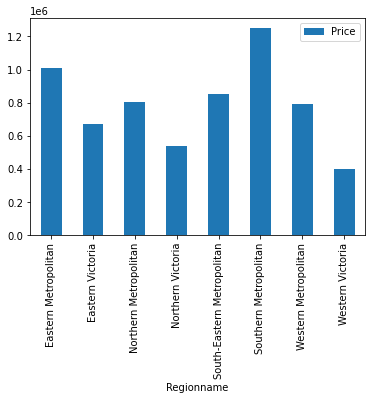

In [4]:
order = ['Price']
df.groupby('Regionname')[order].median().plot.bar(stacked=True)

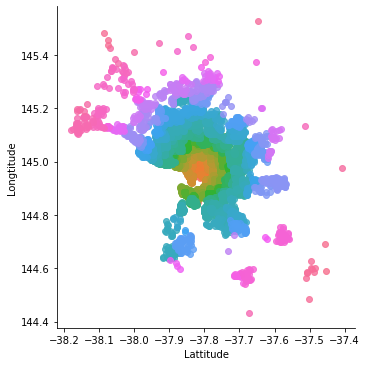

In [5]:
sns.lmplot( x="Lattitude", y="Longtitude", data=df,legend=False, fit_reg=False, hue='Distance')
plt.show()

In [6]:
mean_price = df['Price'].mean()
mean_price

1075684.079455081

In [7]:
import scipy.stats

df_sample = df[df['Regionname'] == 'Northern Metropolitan'].sample(frac=0.005)

sample_mean = df_sample['Price'].mean()
sample_mean

980157.8947368421

In [8]:
std_error = scipy.stats.sem(df_sample['Price'], nan_policy='omit')
std_error

84775.5296522761

In [11]:
z = (sample_mean - mean_price) / (std_error)
z

-1.126813186659625

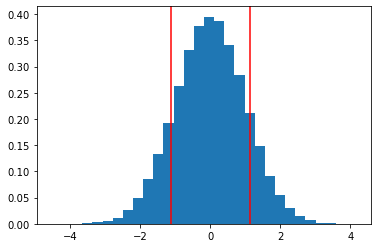

In [12]:
def p_left_of_z(z):
    return scipy.stats.norm(0, 1).cdf(z)

ndst = np.random.normal(0, 1, 100000)
plt.hist(ndst, bins=30, density=True)


plt.axvline(x=-z, color='red')
plt.axvline(x=z, color='red')
plt.show()

In [13]:
p = 2*p_left_of_z(-z)
p

1.7401785260064975

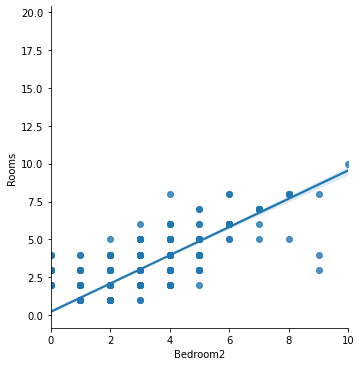

In [14]:
sns.lmplot( x="Bedroom2", y="Rooms", data=df,legend=False)
plt.xlim(0, 10)
plt.show()

In [15]:
df.corr()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.496634,0.294203,0.055303,0.944190,0.592934,0.408483,0.025678,0.124127,-0.065413,0.015948,0.100771,-0.081530
Price,0.496634,1.000000,-0.162522,0.107867,0.475951,0.467038,0.238979,0.037507,0.090981,-0.323617,-0.212934,0.203656,-0.042153
Distance,0.294203,-0.162522,1.000000,0.431514,0.295927,0.127155,0.262994,0.025004,0.099481,0.246379,-0.130723,0.239425,-0.054910
Postcode,0.055303,0.107867,0.431514,1.000000,0.060584,0.113664,0.050289,0.024558,0.055475,0.032863,-0.406104,0.445357,0.062304
Bedroom2,0.944190,0.475951,0.295927,0.060584,1.000000,0.584685,0.405325,0.025646,0.122319,-0.053319,0.015925,0.102238,-0.081350
Bathroom,0.592934,0.467038,0.127155,0.113664,0.584685,1.000000,0.322246,0.037130,0.111933,0.152702,-0.070594,0.118971,-0.052201
Car,0.408483,0.238979,0.262994,0.050289,0.405325,0.322246,1.000000,0.026770,0.096101,0.104515,-0.001963,0.063395,-0.024295
Landsize,0.025678,0.037507,0.025004,0.024558,0.025646,0.037130,0.026770,1.000000,0.500485,0.036451,0.009695,0.010833,-0.006854
BuildingArea,0.124127,0.090981,0.099481,0.055475,0.122319,0.111933,0.096101,0.500485,1.000000,0.019665,0.043420,-0.023810,-0.028840
YearBuilt,-0.065413,-0.323617,0.246379,0.032863,-0.053319,0.152702,0.104515,0.036451,0.019665,1.000000,0.060445,-0.003470,0.006361


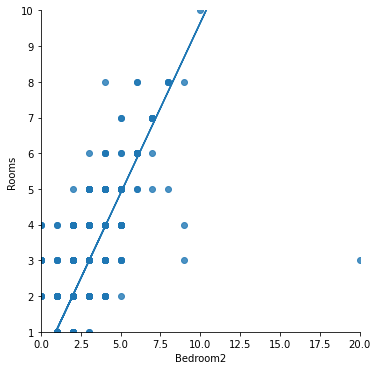

In [16]:
# fit the model
model = ols(formula = 'Bedroom2 ~ Rooms', data=df)
res = model.fit()
b, m = res.params

x = df['Bedroom2']

# make the plot
sns.lmplot( x="Bedroom2", y="Rooms", data=df, fit_reg=False)


plt.plot(x, m*x + b)

plt.xlim(min(df["Bedroom2"]), max(df["Bedroom2"]))
plt.ylim(min(df["Rooms"]), max(df["Rooms"]))
plt.show()

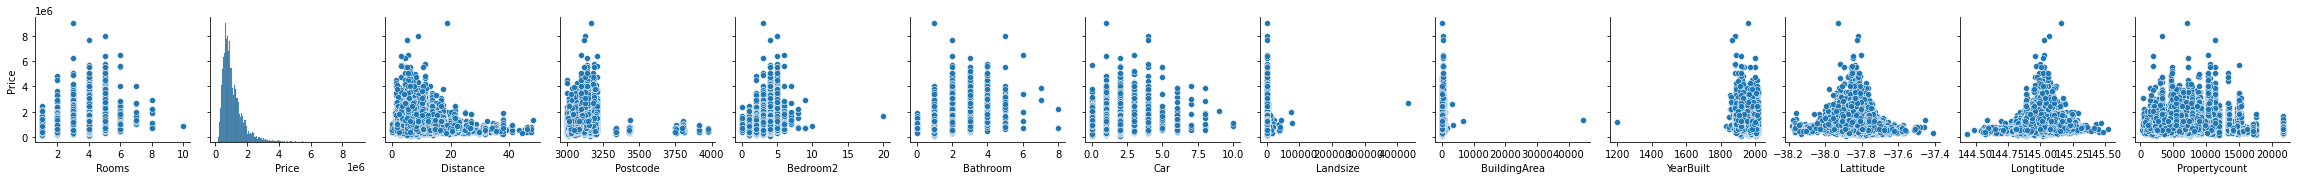

In [17]:
sns.pairplot(data=df, y_vars="Price")

In [18]:
df = df.dropna()
model = ols(formula = 'Price ~ Bathroom + Bedroom2 + YearBuilt', data=df)
res2 = model.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     1619.
Date:                Wed, 09 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:02:18   Log-Likelihood:                -90165.
No. Observations:                6196   AIC:                         1.803e+05
Df Residuals:                    6192   BIC:                         1.804e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.236e+07   3.43e+05     36.031      0.000    1.17e+07     1.3e+07
Bathroom    3.908e+05   1.18e+04     32.996      0.000    3.68e+05    4.14e+05
Bedroom2    1.671e+05   8590.725     19.453      0.000     1.5e+05    1.84e+05
YearBuilt  -6309.2435    174.158    -36.227      0.000   -6650.653   -5967.834
==============================================================================
Omnibus:                     3852.671   Durbin-Watson:                   1.484
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           144837.499
Skew:                           2.402   Prob(JB):                         0.00
Kurtosis:                      26.194   Cond. No.                     1.05e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
# take random 10% of the sales for testing
train, val = train_test_split(df, test_size=0.1, random_state=2020)

In [20]:
train['Bedroom_to_Bathroom'] = train['Bedroom2'] / train['Bathroom'] 
val['Bedroom_to_Bathroom'] = val['Bedroom2'] / val['Bathroom'] 

<ipython-input-20-07bfdea74e5c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Bedroom_to_Bathroom'] = train['Bedroom2'] / train['Bathroom']
<ipython-input-20-07bfdea74e5c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val['Bedroom_to_Bathroom'] = val['Bedroom2'] / val['Bathroom']


In [21]:
# train:
train[train==np.inf]=np.nan
trian = train.dropna()

train['Bedroom_to_Bathroom'].round(decimals = 2)

# val:
val[val==np.inf]=np.nan
val = val.dropna()

val['Bedroom_to_Bathroom'].round(decimals = 2)

<ipython-input-21-7e0e1be0e499>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[train==np.inf]=np.nan
C:\Users\Brooke\anaconda3\lib\site-packages\pandas\core\frame.py:3215: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)
<ipython-input-21-7e0e1be0e499>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

2559     2.00
6833     1.00
1020     3.00
1624     2.00
195      3.00
         ... 
8431     1.00
2516     2.00
4336     1.33
4043     1.00
10618    3.00
Name: Bedroom_to_Bathroom, Length: 620, dtype: float64

In [22]:
# build model on training set
model = ols(formula = 'Price ~ Bathroom + Bedroom2 + Bedroom_to_Bathroom + YearBuilt', data=train)
res = model.fit()

# predict using the model
y_pred = res.predict(val)

# score the model
y = val['Price']
y_mean = train['Price'].mean()  # use the mean of the training set

TSS = sum((y - y_mean)**2)
RSS = sum((y_pred - y)**2)
print(f'This model has an R^2 on the test set of {(TSS - RSS) / TSS}')

This model has an R^2 on the test set of 0.35547988331853436


In [23]:

# training set:
train['above_median'] = train['Price'].apply(lambda x : int(x >= (train['Price'].median())))

# validation set:
val['above_median'] = val['Price'].apply(lambda x : int(x >= (val['Price'].median())))

<ipython-input-23-23180840c5b3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['above_median'] = train['Price'].apply(lambda x : int(x >= (train['Price'].median())))


In [24]:
y_pred = res.predict(train)
y_pred = y_pred > train["Price"].median()

In [25]:
correct = sum(y_pred == train['above_median'])
accuracy = correct / len(y_pred)
print(f'This model has accuracy: {100*accuracy}%')

This model has accuracy: 75.21520803443329%


In [27]:
from statsmodels.formula.api import logit

model2 = logit(formula = 'above_median ~ Bathroom + Bedroom2 + Bedroom_to_Bathroom + YearBuilt', data=train)
res2 = model2.fit()

Optimization terminated successfully.
         Current function value: 0.461803
         Iterations 7


In [29]:
x = val[['Bathroom','Bedroom2', 'Bedroom_to_Bathroom', 'YearBuilt']]
y = val['above_median']

In [30]:
y_pred_prob = res.predict(x)
y_pred = (y_pred_prob >= 0.5).apply(int)

In [31]:
acc = metrics.accuracy_score(y, y_pred)
print(f'This model has accuracy: {100*accuracy}%')

This model has accuracy: 75.21520803443329%


In [32]:
recall = metrics.recall_score(y, y_pred)
prec = metrics.precision_score(y, y_pred)

print(f'The Recall of the model on the validation set is {recall}')
print(f'The Precision of the model on the validation set is {prec}')

The Recall of the model on the validation set is 1.0
The Precision of the model on the validation set is 0.5


In [33]:
# chose to use Ridge regression due to lower amount of variables 
from sklearn.linear_model import Ridge

x_train = train[['Bathroom', 'Bedroom2', 'Bedroom_to_Bathroom', 'YearBuilt']]
y_train = train['Price']

model = Ridge(alpha=10.0)
model.fit(x_train,y_train)

y_pred = model.predict(x_train)

# score the model
r2 = model.score(x_train, y_train)
print(f'This model has an R^2 on the train set of {r2}')

This model has an R^2 on the train set of 0.45029106193014945


In [35]:
from sklearn.model_selection import GridSearchCV

model = Ridge()

# pass other parameters
params = {'alpha' : [0.001, 0.001, 0.01, 0.1, 0.5, 1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]}

# define the search
search = GridSearchCV(model, params, scoring='r2', cv=9)

df['Bedroom_to_Bathroom'] = df['Bedroom2'] / df['Bathroom'] 
df[df==np.inf]=np.nan
df = df.dropna()
df['Bedroom_to_Bathroom'].round(decimals = 2)

# shuffle the data, GridSearch does not shuffle
df2 = df.sample(frac=1, random_state=2020)
x = df[['Bathroom', 'Bedroom2', 'Bedroom_to_Bathroom', 'YearBuilt']]
y = df['Price']

# execute search
result = search.fit(x, y)

<ipython-input-35-f3fbbecae7c1>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Bedroom_to_Bathroom'] = df['Bedroom2'] / df['Bathroom']
<ipython-input-35-f3fbbecae7c1>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df==np.inf]=np.nan
C:\Users\Brooke\anaconda3\lib\site-packages\pandas\core\frame.py:3215: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

In [36]:
result.best_score_, result.best_params_

(0.40475310517131075, {'alpha': 20})